# K-Means Clustering 

- Problem : 
Bagaimana pembagian cluster berdasarkan beberapa feature 

- Goal 
Dapat mengetahui cluster yang terbentuk untuk mengetahui bagaimana kriteria pelanggan untuk mempertahankan pelanggan

- Objektif 
Membuat pemodelan clustering 

- Business Metric 
customer rate 

## About Data 

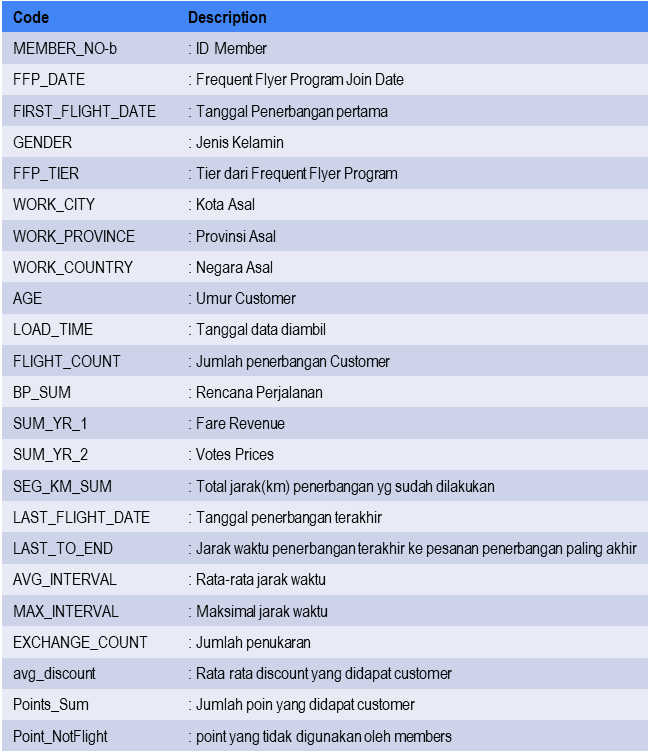

In [ ]:
#Library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# To Display Output without max columns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Define Dataset 
df = pd.read_csv('/content/drive/MyDrive/Gcollab /flight.csv', delimiter=',')


In [ ]:

# developer-friendly columns name 
df.columns = [x.lower().replace(' ', '_').replace('-', '_') for x in df.columns.to_list()]

df.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
34560,4282,9/5/2009,9/5/2009,Female,4,NaN,NaN,CN,47.0,3/31/2014,4,5275,3010.0,2406.0,8135,1/24/2014,68,138.666667,350,0,0.742707,5275,0
31010,51093,11/22/2011,12/25/2011,Male,4,nanning,guangxi,CN,38.0,3/31/2014,8,6032,3306.0,3597.0,12406,2/1/2014,60,89.428571,163,0,0.575530,6032,0
17577,44832,9/9/2005,9/9/2005,Male,4,changchunshi,jilinsheng,CN,48.0,3/31/2014,18,10086,1639.0,7277.0,21337,1/4/2014,88,24.529412,83,3,0.650544,16417,17
62026,33112,10/22/2012,10/22/2012,Male,4,jiangsu,jiangsu,CN,40.0,3/31/2014,2,505,834.0,0.0,1308,12/15/2012,473,54.000000,54,0,0.651491,505,0
17443,17000,3/10/2011,3/10/2011,Male,4,beijingshi,beijingshi,CN,48.0,3/31/2014,18,12755,6001.0,6096.0,18714,1/7/2014,85,35.176471,168,1,0.747361,12755,2


## EDA - Exploratory Data Analysis

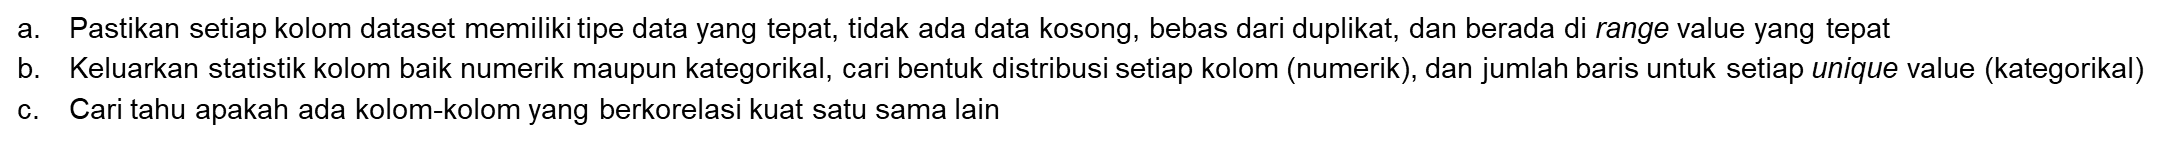

### Descriptive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

In [ ]:
df.isna().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

- ffp_date, first_flight_date, load_time, last_flight_date (datetime)
- Null Value (v) ->> work_city, work_province, work_country, age, sum_yr_1, sum_yr_2, gender

In [ ]:
df = df.loc[(df['last_flight_date'] != '2014/2/29  0:00:00')]

# to Transform dataType
df['ffp_date'] = pd.to_datetime(df['ffp_date'])
df['first_flight_date'] = pd.to_datetime(df['first_flight_date'])
df['load_time'] = pd.to_datetime(df['load_time'])
df['last_flight_date'] = pd.to_datetime(df['last_flight_date'])

#Pick and Separate Columns by dataType
#Numerical 
num_dtypes = ['int64', 'float64']
num_df = df.select_dtypes(include=num_dtypes)
numeric = num_df.columns

print(numeric)

#Categorical
cat_df = df.select_dtypes(include='object')
categoric = cat_df.columns

print(categoric)

#Datetime
timesrs_df = df.select_dtypes(include='datetime64[ns]')
timesrs = timesrs_df.columns

print(timesrs)

Index(['member_no', 'ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1',
       'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval',
       'exchange_count', 'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')
Index(['gender', 'work_city', 'work_province', 'work_country'], dtype='object')
Index(['ffp_date', 'first_flight_date', 'load_time', 'last_flight_date'], dtype='object')


In [ ]:
# Check Value for each Columns -- Check Invalid Data 

for x in df.columns.to_list() : 
  print(x + '=')
  print(df[x].sort_values().unique())
  print('')

member_no=
[    1     2     3 ... 62986 62987 62988]

ffp_date=
['2004-11-01T00:00:00.000000000' '2004-11-02T00:00:00.000000000'
 '2004-11-03T00:00:00.000000000' ... '2013-03-29T00:00:00.000000000'
 '2013-03-30T00:00:00.000000000' '2013-03-31T00:00:00.000000000']

first_flight_date=
['1905-12-31T00:00:00.000000000' '2004-11-03T00:00:00.000000000'
 '2004-11-04T00:00:00.000000000' ... '2015-03-09T00:00:00.000000000'
 '2015-04-03T00:00:00.000000000' '2015-05-30T00:00:00.000000000']

gender=
['Female' 'Male' nan]

ffp_tier=
[4 5 6]

work_city=
['#NAME?' '*' '**' ... '．' 'ＴＷ' nan]

work_province=
['#NAME?' '*' '**' ... '．' 'ＴＷ' nan]

work_country=
['AA' 'AB' 'AE' 'AN' 'AR' 'AS' 'AT' 'AU' 'AZ' 'BB' 'BD' 'BE' 'BG' 'BI'
 'BN' 'BR' 'BS' 'BZ' 'CA' 'CC' 'CD' 'CH' 'CL' 'CM' 'CN' 'CR' 'CY' 'DE'
 'DK' 'EC' 'EG' 'ES' 'FA' 'FI' 'FL' 'FO' 'FR' 'GB' 'GE' 'GH' 'GL' 'GN'
 'GT' 'GU' 'HK' 'HN' 'HU' 'IA' 'ID' 'IE' 'IL' 'IN' 'IR' 'IT' 'JP' 'KA'
 'KE' 'KH' 'KO' 'KR' 'KZ' 'LA' 'LB' 'MA' 'MN' 'MO' 'MS' 'MV' 'MX'

In [ ]:
df[numeric].describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62567.000000,62567.000000,62148.000000,62567.000000,62567.000000,62016.000000,62429.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000,62567.000000
mean,31490.970799,4.101971,42.481303,11.814391,10906.691786,5352.327839,5588.828205,17095.441159,177.089856,67.774899,165.886969,0.319306,0.721555,12524.515959,2.726533
std,18176.932860,0.373871,9.886526,14.051878,16351.867568,8116.830365,8707.792799,20974.464921,184.057816,77.606573,123.393978,1.137151,0.185485,20524.415318,7.360838
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15756.500000,4.000000,35.000000,3.000000,2509.000000,1005.750000,768.000000,4732.000000,29.000000,23.333333,79.000000,0.000000,0.611875,2764.000000,0.000000
50%,31482.000000,4.000000,41.000000,7.000000,5681.000000,2800.000000,2756.000000,9959.000000,109.000000,44.642857,143.000000,0.000000,0.711826,6303.000000,0.000000
75%,47229.500000,4.000000,48.000000,15.000000,12797.000000,6567.000000,6815.000000,21206.000000,269.000000,82.000000,227.000000,0.000000,0.809611,14249.000000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [ ]:
df[categoric].describe()

,gender,work_city,work_province,work_country
count,62564,60312,59341,62542
unique,2,3225,1161,118
top,Male,guangzhou,guangdong,CN
freq,47806,9326,17395,57347


In [ ]:
for y in categoric : 
  print(f'''value counts column {y} : ''')
  print(df[y].value_counts())
  print()

value counts column gender : 
Male      47806
Female    14758
Name: gender, dtype: int64

value counts column work_city : 
guangzhou                      9326
beijing                        7783
shanghai                       4975
shenzhen                       3583
dalian                         1968
shenyang                       1616
changchun                      1516
wulumuqi                       1461
wuhan                          1140
haerbin                         937
guangzhoushi                    934
shenyangshi                     823
zhengzhou                       745
.                               663
changsha                        631
foshan                          623
dongguan                        533
zhuhai                          517
shanghaishi                     500
hangzhou                        484
nanjing                         475
shantou                         439
guiyang                         427
changchunshi                    413
chengdu      

### Univariate

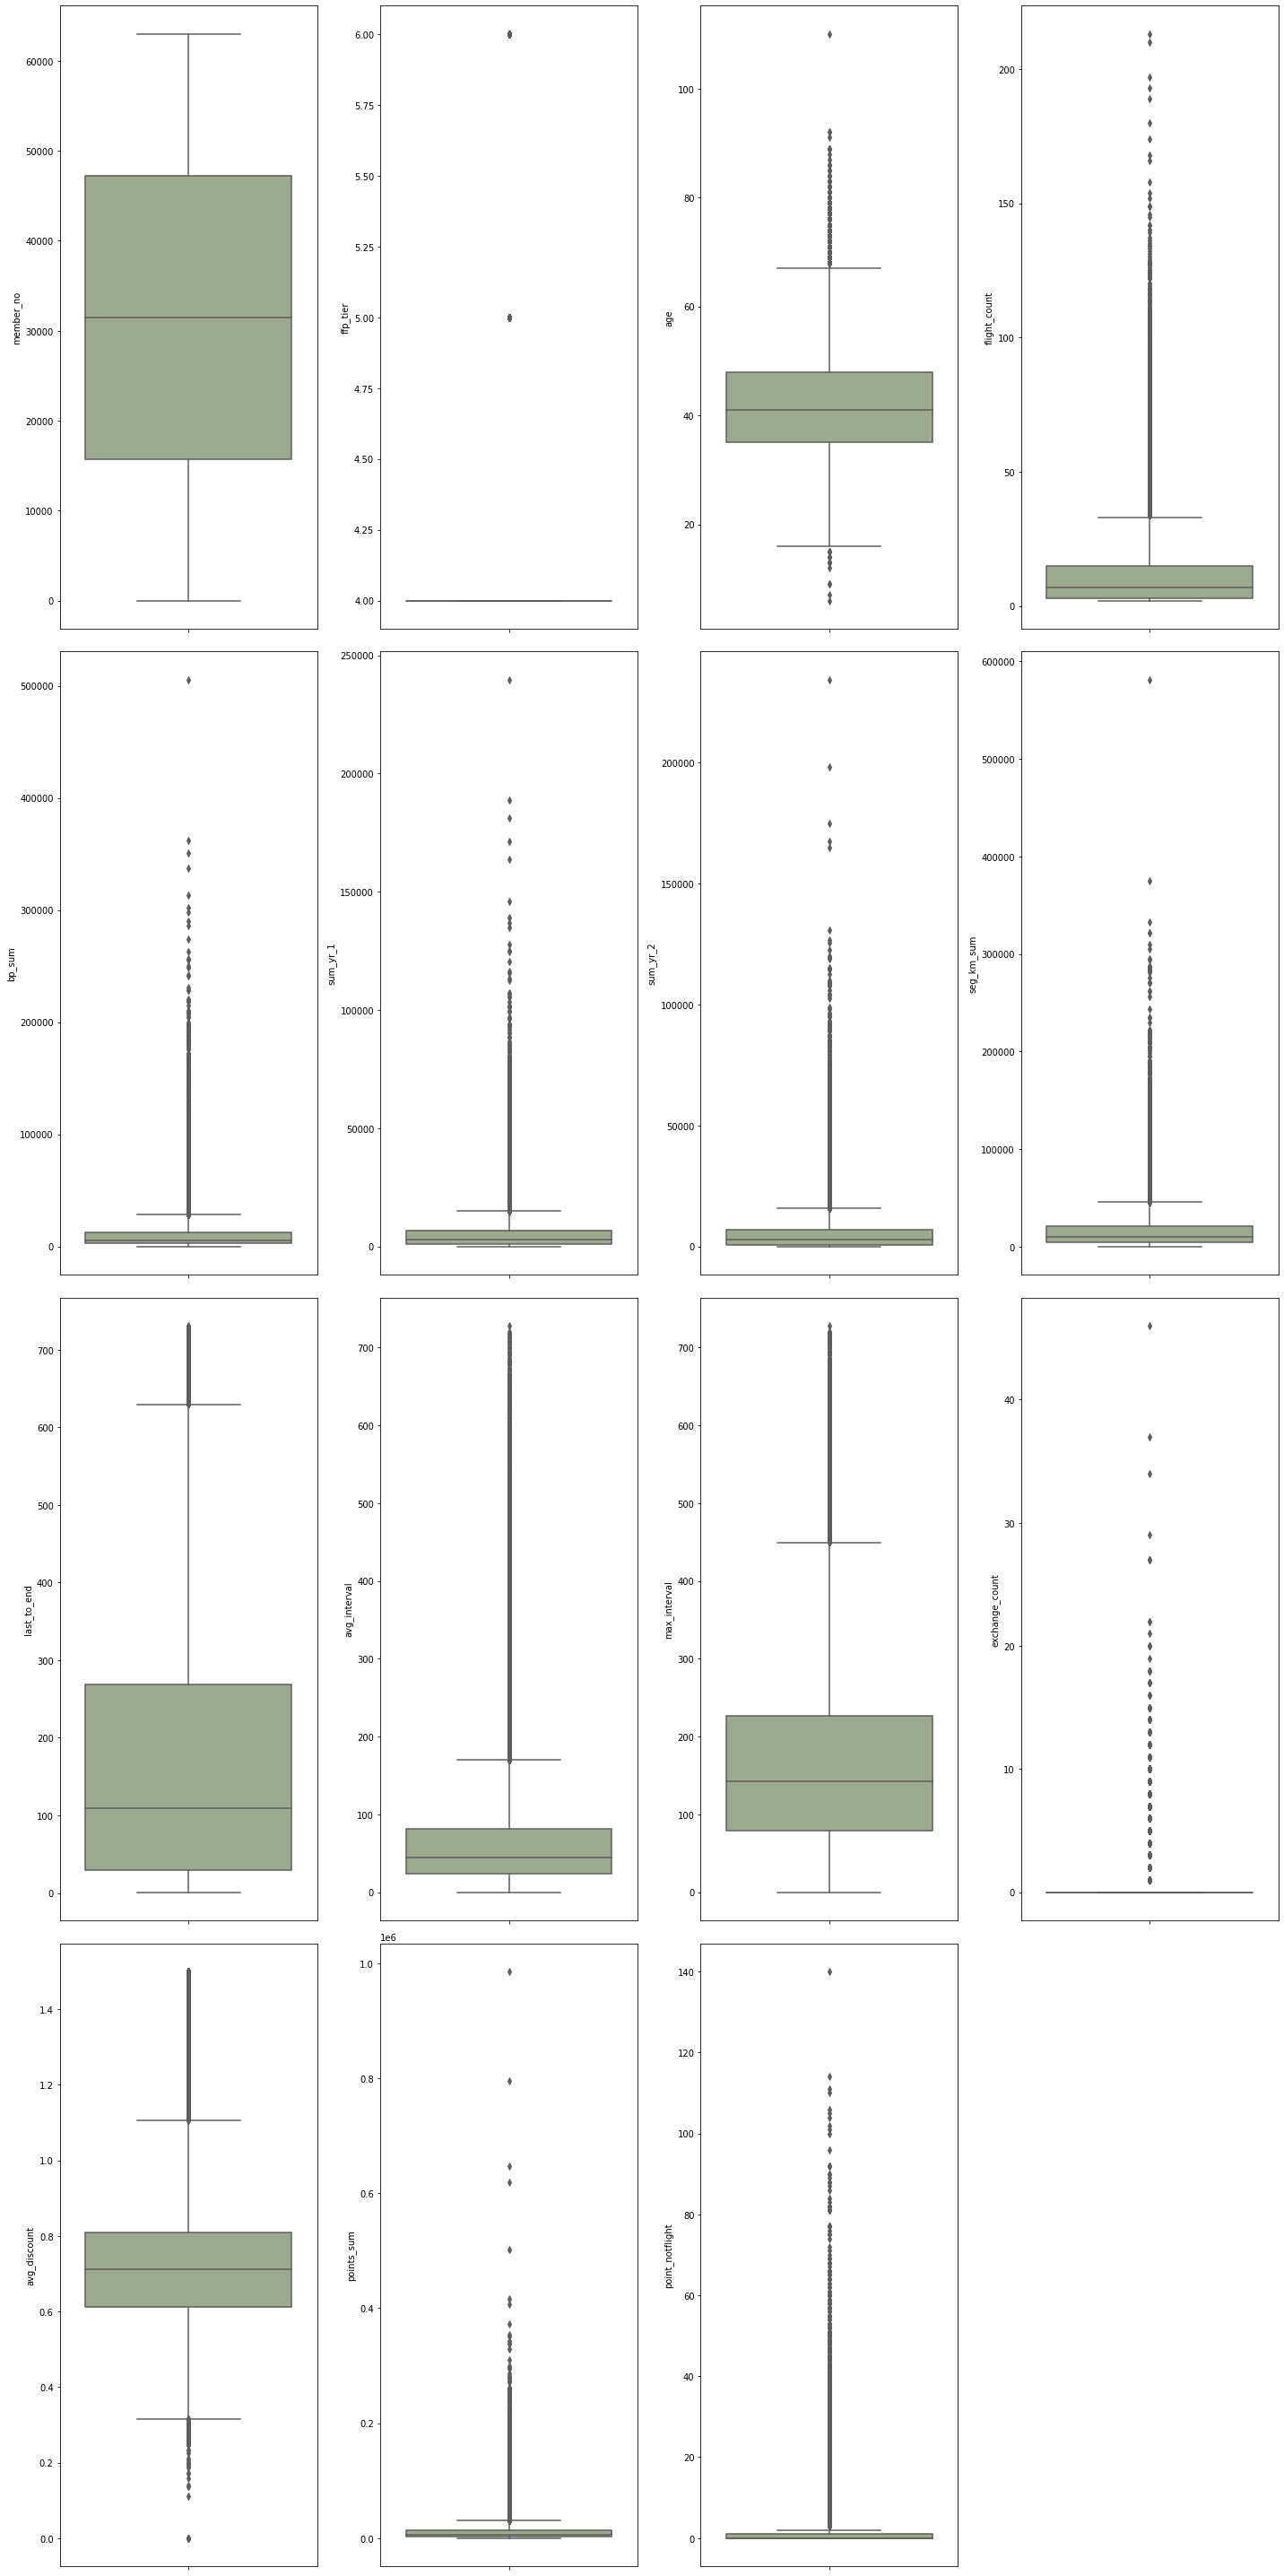

In [ ]:
# Individual BoxPlot 
plt.figure(figsize=(20,40))
for i in range(0, len(numeric)):
    plt.subplot(4, (len(numeric)/4)+1, i+1)
    sns.boxplot(y=df[numeric[i]], color='#9CAF88', orient='v')
    plt.tight_layout()

Fitur dengan outlier : age, flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, exchange_count, points_sum, point_notflight

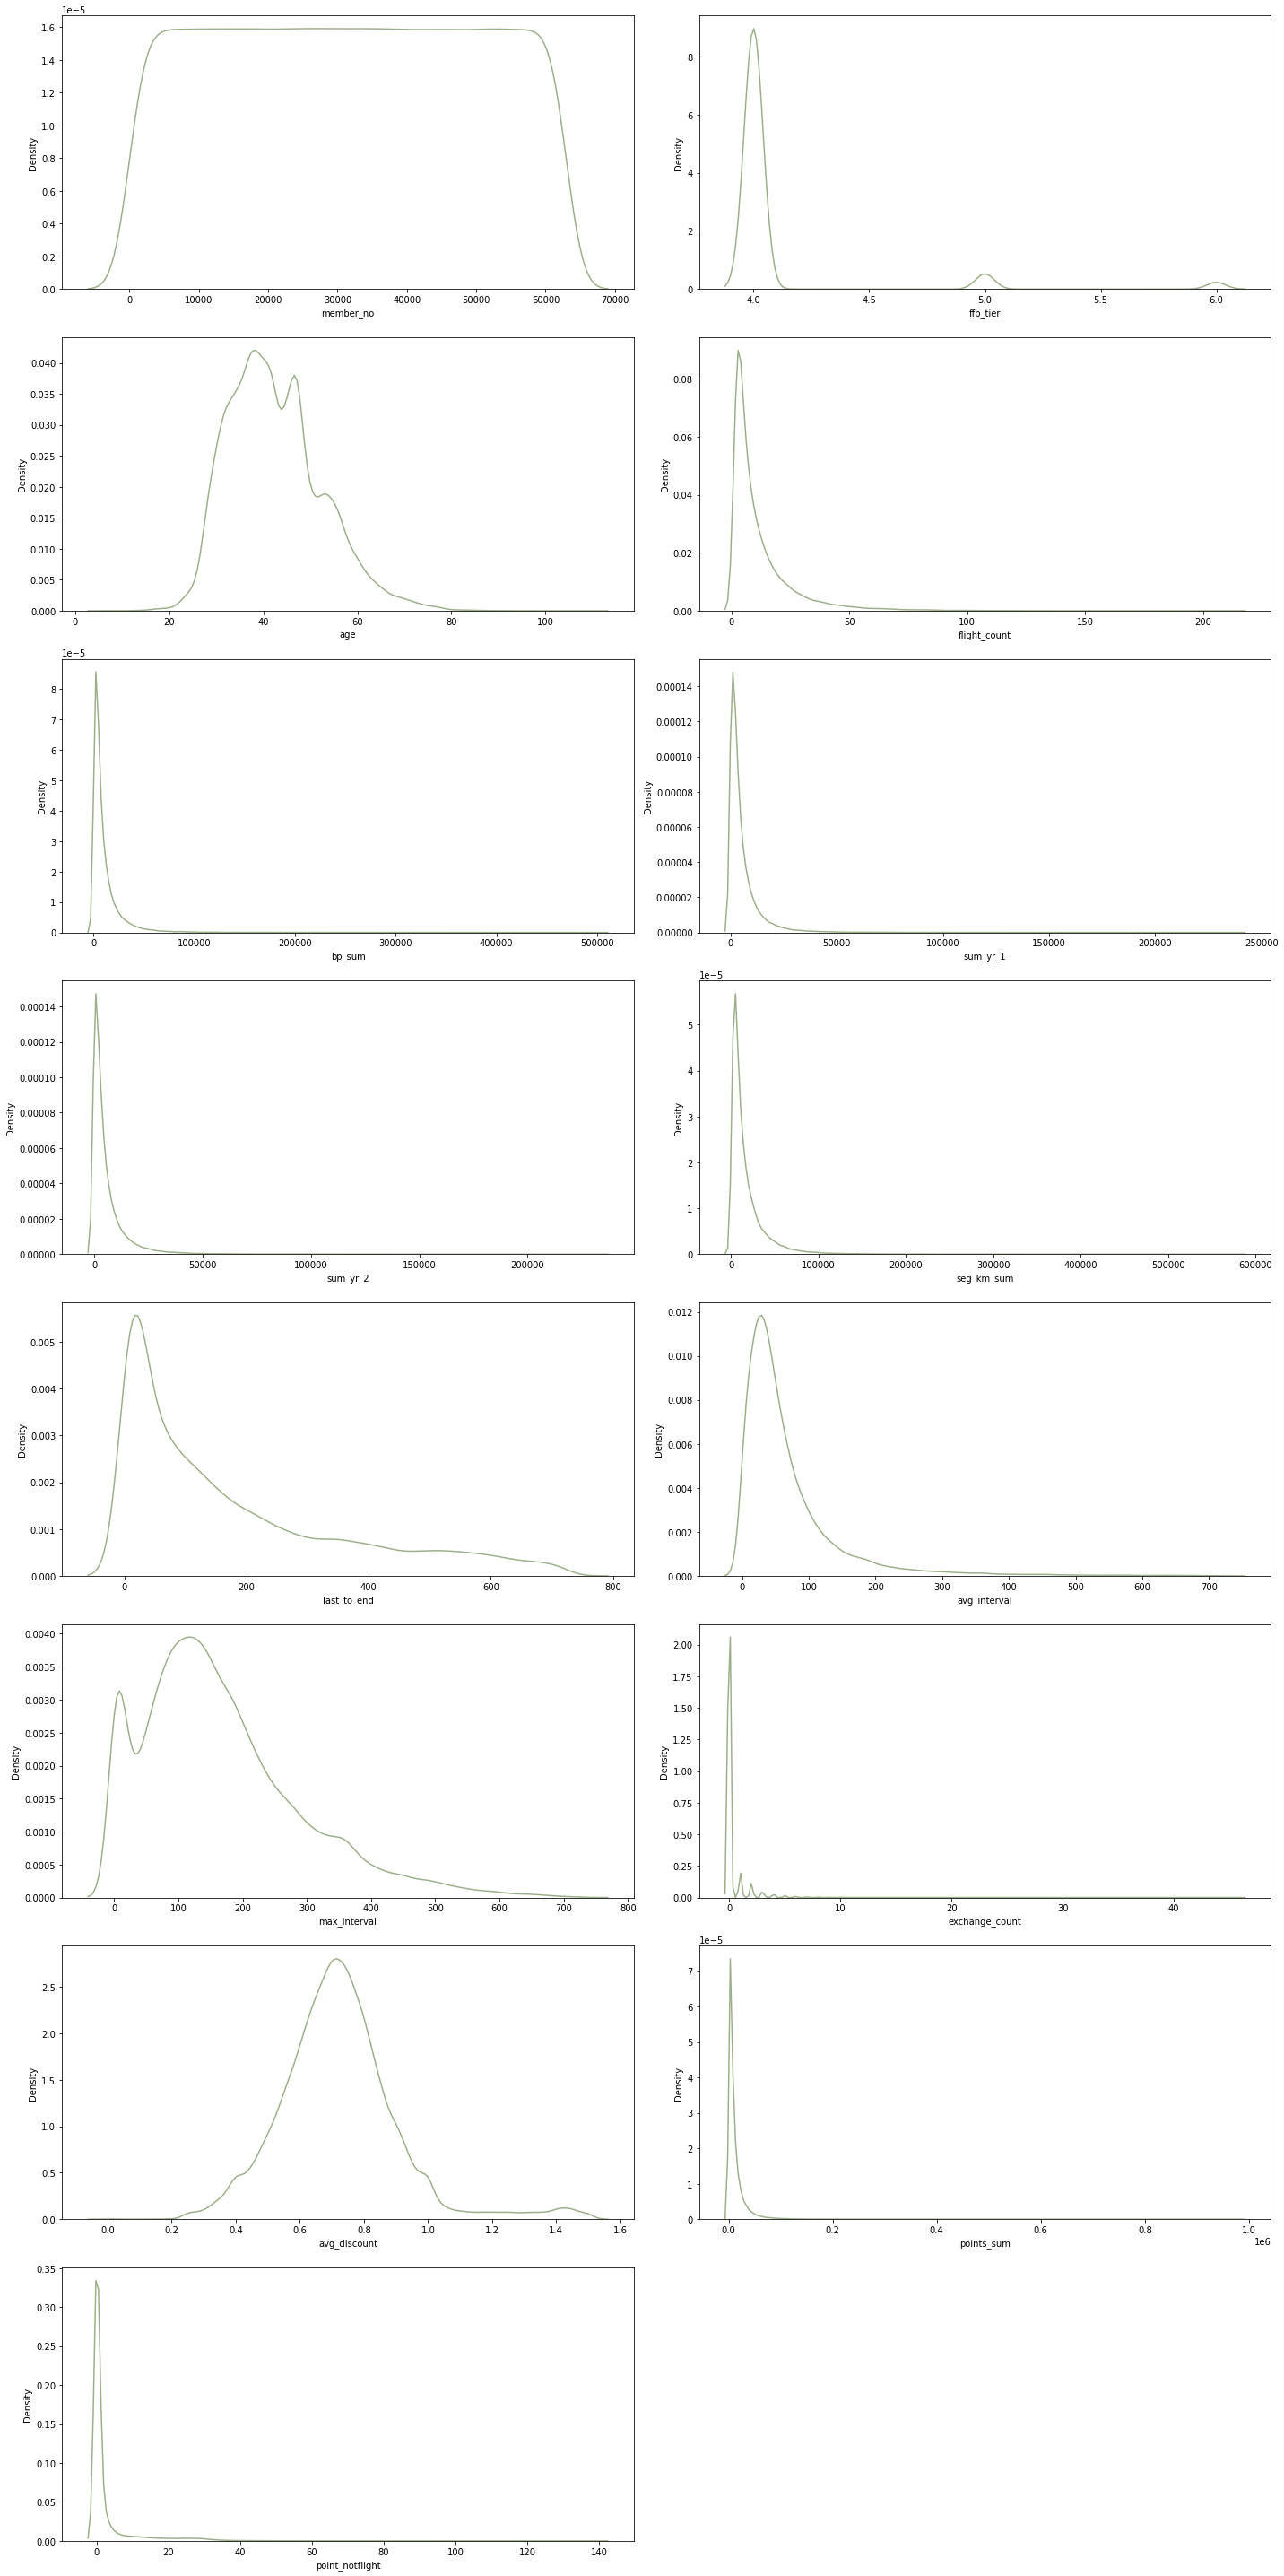

In [ ]:
plt.figure(figsize=(20, 40))
for i in range(0, len(numeric)):
  plt.subplot(8, (len(numeric)/8)+1, i+1)
  sns.kdeplot(x=df[numeric[i]], color='#9CAF88')
  plt.xlabel(numeric[i])
  plt.tight_layout()

positif skew : ffp_tier, flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, last_to_end, avg_interval, exchange_count, points_sum, avg_discount, point_notflight

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57385 missing from current font.
  font.set_

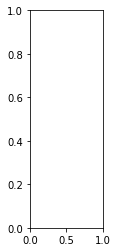

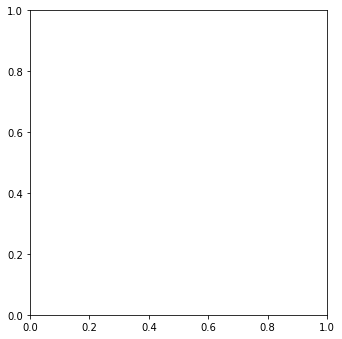

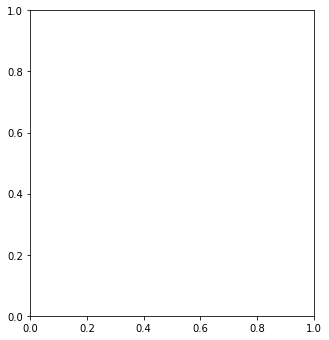

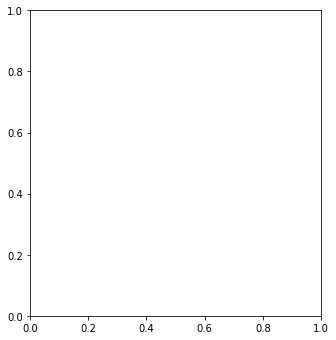

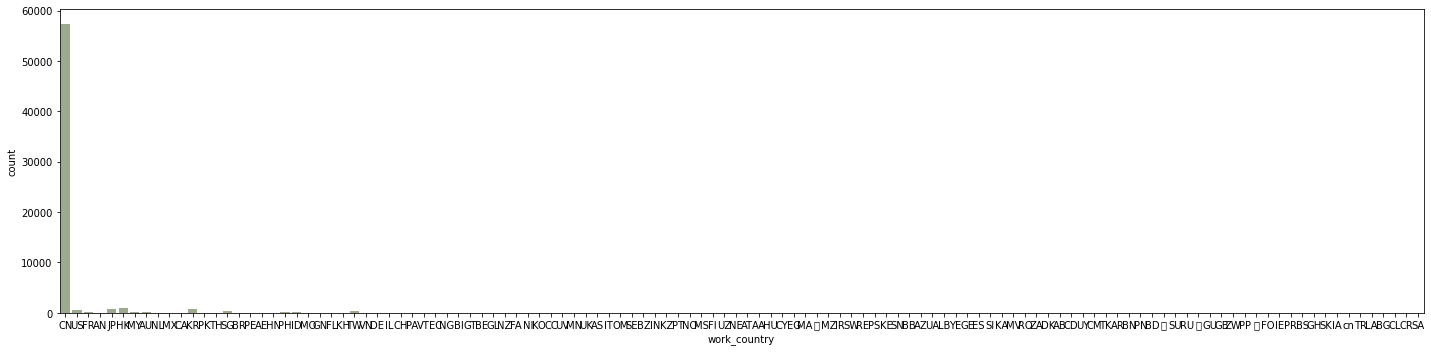

In [ ]:
for i in range(0, len(categoric)): 
  plt.subplot(1, len(categoric), i+1)
  plt.figure(figsize=(20,5))
  sns.countplot( x = df[categoric[i]], color='#9CAF88')
  plt.tight_layout()

### Multivariate

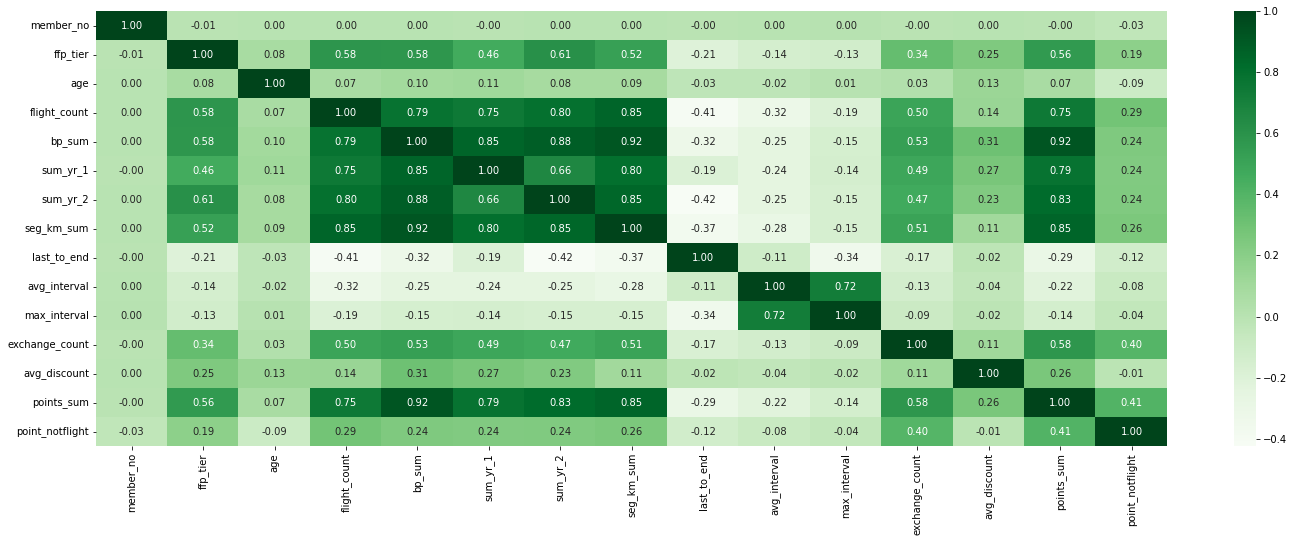

In [ ]:
df_new = df.copy()
plt.figure(figsize =(24,8))
sns.heatmap(df_new.corr(), cmap='Greens', annot= True, fmt ='.2f')

## Feature Engineering

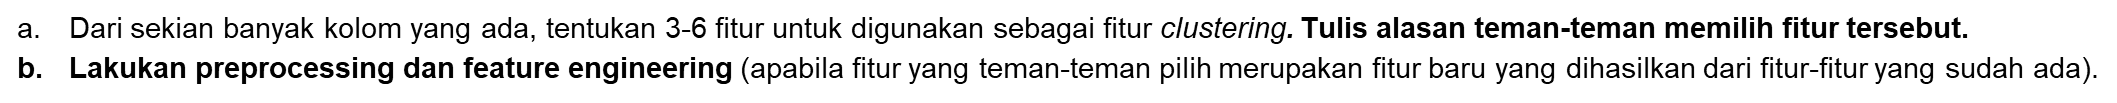

### Data Preprocessing 

In [ ]:
df_new = df.copy()

In [ ]:
df.columns

Index(['member_no', 'ffp_date', 'first_flight_date', 'gender', 'ffp_tier',
       'work_city', 'work_province', 'work_country', 'age', 'load_time',
       'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum',
       'last_flight_date', 'last_to_end', 'avg_interval', 'max_interval',
       'exchange_count', 'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

In [ ]:
# Non duplicate value 

In [ ]:
import scipy as stats 

stats.__version__

'1.7.3'

In [ ]:
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [ ]:
#Handle Outlier 

import scipy.stats

print(f'jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_enteries = np.array([True] * len (df))

for col in [ 'flight_count', 'bp_sum', 'seg_km_sum', 'exchange_count', 'points_sum', 'point_notflight']:
  zscore = abs(scipy.stats.zscore(df[col]))
  filtered_enteries = (zscore < 3) & filtered_enteries
    
df = df[filtered_enteries]

print(f'jumlah baris sesudah memfilter outlier: {len(df)}')

jumlah baris sebelum memfilter outlier: 62567
jumlah baris sesudah memfilter outlier: 57975


In [ ]:
colmuns = df.columns

### Feature Selection 


----
Dalam pemodelan clustering ini digunakan empat feature diantaranya : 
- LAST_TO_END (Recency), waktu transaksi terakhir pelanggan 
- FLIGHT_COUNT (Frequency), total transaksi yang dilakukan oleh pelanggan 
- SEG_KM_SUM (Monetary), total KM 
- Avg_Discount (coefficient), rata-rata discount yang didapatkan oleh pelanggan 

dan satu feature tambahan yang diperoleh dari : 
- (FFP_DATE - LOAD_TIME) Length relation, jarak waktu registrasi dan data didapatkan 


---

untuk segmentasi pelanggan berdasarkan demografi spt gender, usia dan geografis pelanggan namun pada data ini value tsb cenderung tidak lengkap sehingga ada indikasi data tsb tidak valid. sehingga dalam pemodelan kali ini dilakukan segmentasi berdasarkan behaviour pelanggan






In [ ]:
df['length_relation'] = df['load_time']- df['ffp_date']
df.head(2)

<ipython-input-18-b99c11bdbac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length_relation'] = df['load_time']- df['ffp_date']


,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,length_relation
1028,34723,2010-08-20,2010-12-17,Male,4,shanghai,shanghai,CN,54.0,2014-03-31,47,59849,25869.0,21509.0,79014,2014-03-28,4,15.760870,104,0,0.886656,61205,2,1319 days
1080,44424,2011-02-27,2011-08-20,Male,4,nanyangshi,henan,CN,56.0,2014-03-31,44,59941,35009.0,21284.0,78334,2013-12-31,92,14.860465,80,2,0.872088,62501,4,1128 days


In [ ]:
df = df[['length_relation', 'last_to_end', 'flight_count', 'seg_km_sum', 'avg_discount']]
df.columns = ['L', 'R', 'F', 'M', 'C']

In [ ]:
df.head(3)

,L,R,F,M,C
1028,1319 days,4,47,79014,0.886656
1080,1128 days,92,44,78334,0.872088
1132,2801 days,68,25,77593,0.862744


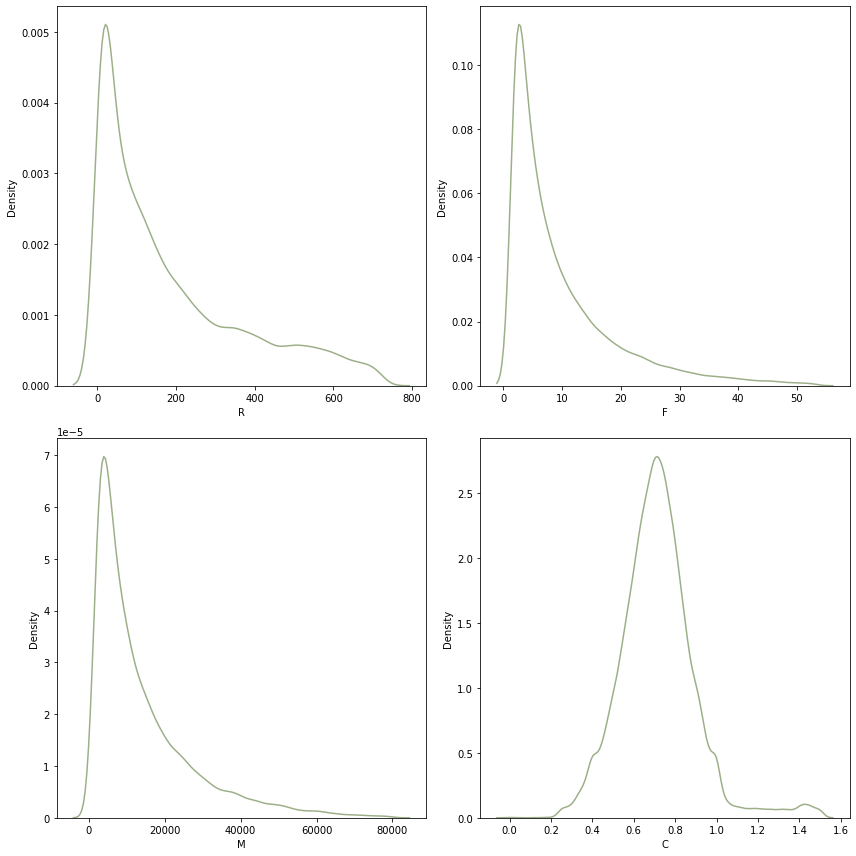

In [ ]:
colmuns = [ 'R', 'F', 'M', 'C']
plt.figure(figsize=(12, 12))
for i in range(0, len(colmuns)):
  plt.subplot(2, (len(colmuns)/2), i+1)
  sns.kdeplot(x=df[colmuns[i]], color='#9CAF88')
  plt.xlabel(colmuns[i])
  plt.tight_layout()

In [ ]:
positive_skewed = ['R', 'F', 'M']
for i in positive_skewed:
    new_i = 'log_' + i
    df[new_i] = np.log(df[i]+1) #plus 1 to prevent -inf

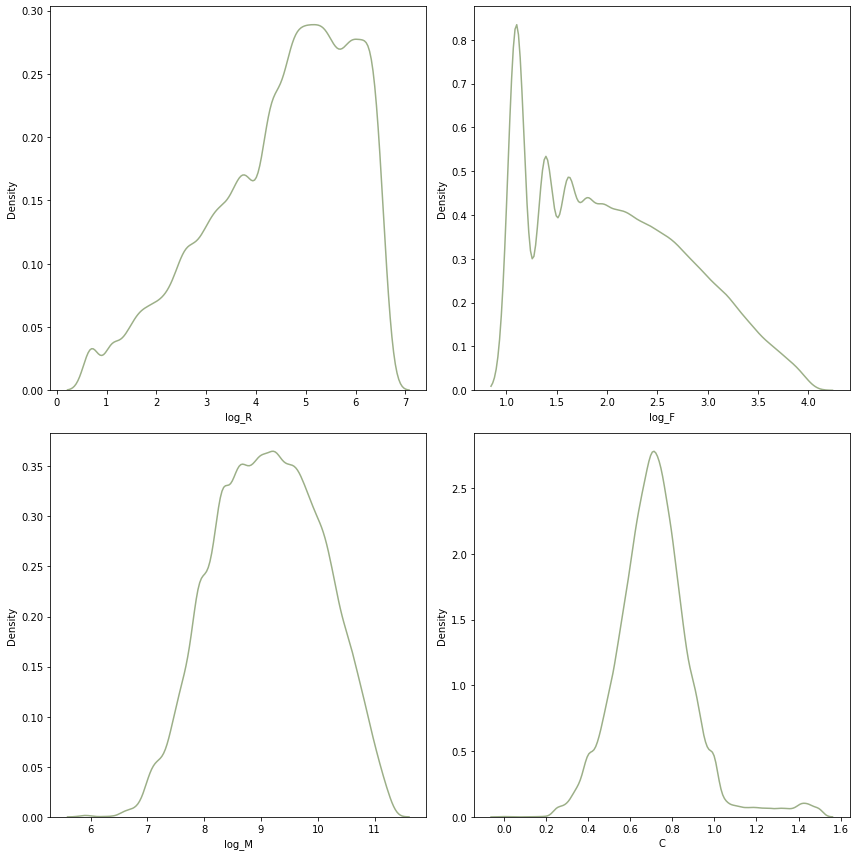

In [ ]:
colmuns1 = [ 'log_R', 'log_F', 'log_M', 'C']
plt.figure(figsize=(12, 12))
for i in range(0, len(colmuns1)):
  plt.subplot(2, (len(colmuns1)/2), i+1)
  sns.kdeplot(x=df[colmuns1[i]], color='#9CAF88')
  plt.xlabel(colmuns1[i])
  plt.tight_layout()

In [ ]:
#Teknik Standarisasi untuk 
from sklearn.preprocessing import StandardScaler

colmuns2 = ['L', 'log_R', 'log_F', 'log_M', 'C']

for i in colmuns2 : 
  new_i ='std_' + i 
  df[new_i] = StandardScaler().fit_transform(df[i].values.reshape(len(df), 1))

df.describe()

,L,R,F,M,C,log_R,log_F,log_M,std_L,std_log_R,std_log_F,std_log_M,std_C
count,57975,57975.000000,57975.000000,57975.000000,57975.000000,57975.000000,57975.000000,57975.000000,5.797500e+04,5.797500e+04,5.797500e+04,5.797500e+04,5.797500e+04
mean,1451 days 20:30:51.694695984,185.249935,9.759724,13991.031100,0.717184,4.512129,2.075629,9.128236,6.912395e-17,-4.804360e-16,3.568953e-16,-4.235680e-16,5.157333e-16
std,838 days 11:50:29.293368400,185.770727,9.291718,13357.111707,0.182866,1.424403,0.753670,0.942451,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,365 days 00:00:00,1.000000,2.000000,368.000000,0.000000,0.693147,1.098612,5.910797,-1.296211e+00,-2.681133e+00,-1.296356e+00,-3.413938e+00,-3.921933e+00
25%,711 days 00:00:00,35.000000,3.000000,4541.000000,0.607790,3.583519,1.386294,8.421123,-8.835623e-01,-6.519347e-01,-9.146448e-01,-7.502991e-01,-5.982215e-01
50%,1230 days 00:00:00,118.000000,6.000000,9260.000000,0.708798,4.779123,1.945910,9.133567,-2.645897e-01,1.874449e-01,-1.721176e-01,5.656470e-03,-4.585744e-02
75%,2142 days 00:00:00,284.000000,13.000000,18788.000000,0.806922,5.652489,2.639057,9.841027,8.230848e-01,8.005952e-01,7.475860e-01,7.563226e-01,4.907343e-01
max,3437 days 00:00:00,731.000000,53.000000,79994.000000,1.500000,6.595781,3.988984,11.289719,2.367535e+00,1.462837e+00,2.538739e+00,2.293491e+00,4.280846e+00


In [ ]:
#Teknik normalisasi untuk 
from sklearn.preprocessing import MinMaxScaler

colmuns2 = ['L', 'log_R', 'log_F', 'log_M', 'C']

for i in colmuns2 : 
  new_i ='mm_' + i 
  df[new_i] = MinMaxScaler().fit_transform(np.array(df[i]).reshape(-1, 1))

df.describe()

,L,R,F,M,C,log_R,log_F,log_M,std_L,std_log_R,std_log_F,std_log_M,std_C,mm_L,mm_log_R,mm_log_F,mm_log_M,mm_C
count,57975,57975.000000,57975.000000,57975.000000,57975.000000,57975.000000,57975.000000,57975.000000,5.797500e+04,5.797500e+04,5.797500e+04,5.797500e+04,5.797500e+04,57975.000000,57975.000000,57975.000000,57975.000000,57975.000000
mean,1451 days 20:30:51.694695984,185.249935,9.759724,13991.031100,0.717184,4.512129,2.075629,9.128236,6.912395e-17,-4.804360e-16,3.568953e-16,-4.235680e-16,5.157333e-16,0.353794,0.646996,0.338025,0.598157,0.478122
std,838 days 11:50:29.293368400,185.770727,9.291718,13357.111707,0.182866,1.424403,0.753670,0.942451,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.272947,0.241317,0.260752,0.175212,0.121911
min,365 days 00:00:00,1.000000,2.000000,368.000000,0.000000,0.693147,1.098612,5.910797,-1.296211e+00,-2.681133e+00,-1.296356e+00,-3.413938e+00,-3.921933e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,711 days 00:00:00,35.000000,3.000000,4541.000000,0.607790,3.583519,1.386294,8.421123,-8.835623e-01,-6.519347e-01,-9.146448e-01,-7.502991e-01,-5.982215e-01,0.112630,0.489675,0.099531,0.466697,0.405193
50%,1230 days 00:00:00,118.000000,6.000000,9260.000000,0.708798,4.779123,1.945910,9.133567,-2.645897e-01,1.874449e-01,-1.721176e-01,5.656470e-03,-4.585744e-02,0.281576,0.692229,0.293145,0.599148,0.472532
75%,2142 days 00:00:00,284.000000,13.000000,18788.000000,0.806922,5.652489,2.639057,9.841027,8.230848e-01,8.005952e-01,7.475860e-01,7.563226e-01,4.907343e-01,0.578451,0.840191,0.532957,0.730672,0.537948
max,3437 days 00:00:00,731.000000,53.000000,79994.000000,1.500000,6.595781,3.988984,11.289719,2.367535e+00,1.462837e+00,2.538739e+00,2.293491e+00,4.280846e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['L', 'R', 'F', 'M', 'C', 'log_R', 'log_F', 'log_M', 'std_L',
       'std_log_R', 'std_log_F', 'std_log_M', 'std_C', 'mm_L', 'mm_log_R',
       'mm_log_F', 'mm_log_M', 'mm_C'],
      dtype='object')

In [ ]:
df_std = df[['std_L', 'std_log_R', 'std_log_F', 'std_log_M', 'std_C']]

In [ ]:
df_mm = df[['mm_L', 'mm_log_R', 'mm_log_F', 'mm_log_M', 'mm_C']]

## Modeling and Evaluation 

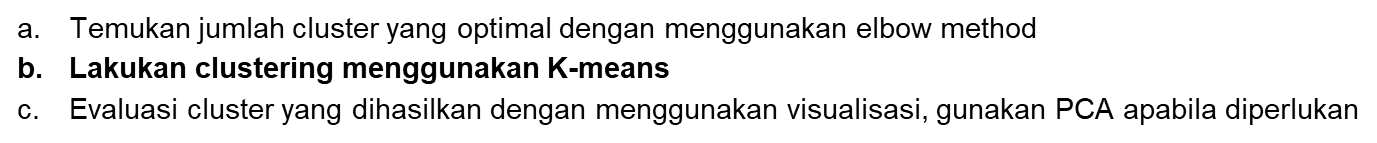

### Elbow Method 

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f33c45fbdc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.8/ctypes/__init__.py", line 373, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.8/dist-packages/scipy.libs/libopenblasp-r0-8b9e111f.3.17.so: cannot open shared 

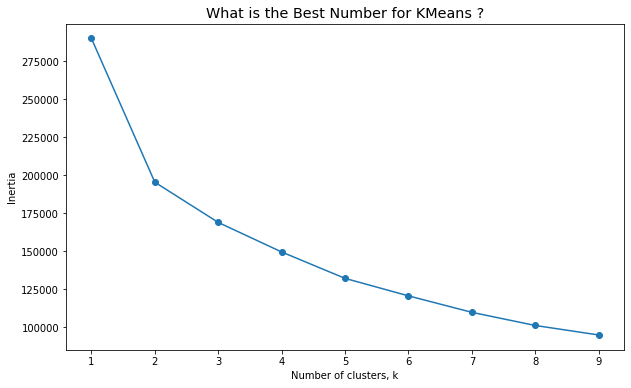

In [ ]:
from sklearn.cluster import KMeans
ks = range(1,10)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=142)
    kc.fit(df_std)
    cluster = kc.fit_predict(df_std)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

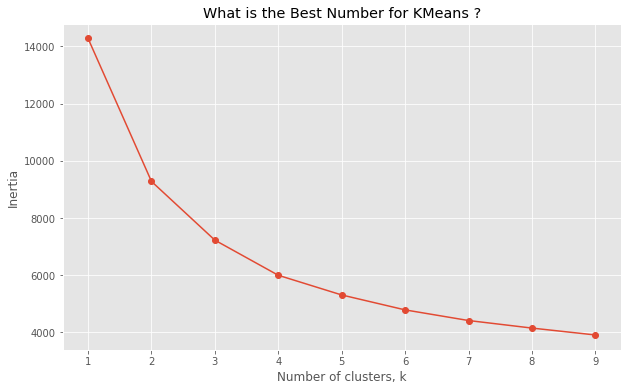

In [ ]:
from sklearn.cluster import KMeans
ks = range(1,10)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=142)
    kc.fit(df_mm)
    cluster = kc.fit_predict(df_mm)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

Best Cluster = 2

### Silhouette

In [ ]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,5):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(df_std)
    preds = clusterer.predict(df_std)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_std, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.15351936893595378
For n_clusters = 3. The average silhouette_score is : 0.1534844684793712
For n_clusters = 4. The average silhouette_score is : 0.11838671857972874


### Modeling

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans.fit(df_std)
df['km_labels'] = kmeans.labels_

## Business Recommendation 

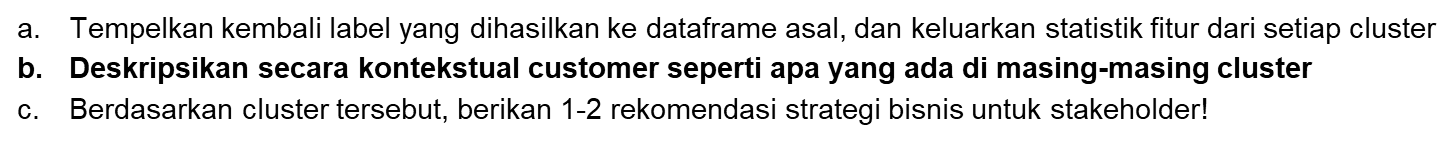

In [ ]:
df_vs = df[['L','R','F','M','C', 'km_labels']]

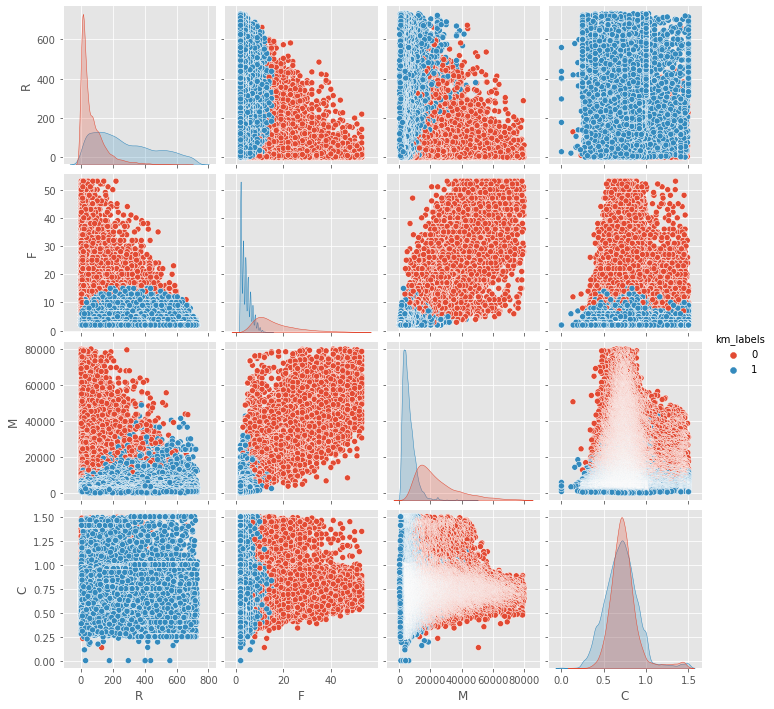

In [ ]:
sns.pairplot(data=df_vs, hue='km_labels')

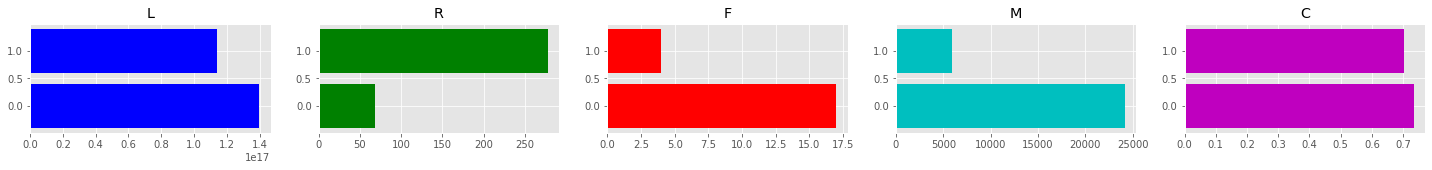

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = df_vs.groupby('km_labels')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

In [ ]:
#Analisis Melalui Angka Statistik yang diperoleh 

df_vs.groupby('km_labels').agg(['mean'])

### Kesimpulan 

Terbentuk 2 cluster segmentasi pelanggan sebagai berikut. 
1. Cluster 0 (Pertama) adalah pelanggan dengan total km besar, recency kecil, frequency besar, monetary besar dan avg_discount besar. 
2. Cluster 1 (kedua) adalah pelanggan dengan total km kecil, recency besar, frequency kecil, monetary kecil dan avg_discount besar. 

Sehingga, dapat disimpulkan bahwa pelanggan dengan monetary yang besar memiliki behaviour adalah total_km dan frequency besar dan recency kecil. Oleh karena itu untuk meningkatkan revenue -- atau monetary dari pelanggan, perusahaan dapat menjangkau pelanggan dengan kriteria tsb. 

### Rekomendasi 


Cluster 0 (middle class customer):

    * Dapat dilihat dari data yang sudah ada bahwa member pada cluster 0 memiliki durasi membership selama 43 bulan yang memiliki jarak penerbangan sebesar 10.846 kilometer yang memiliki rata rata penerbangan diatas 8 kali

Cluster 1 (Low Class Customer):

    * Dapat dilihat dari data yang suda ada bahwa member pada cluster 1 memiliki durasi berlangganan selama 39 bulan dan memiliki jarak penerbangan sebesar 9.176 kilometer yang memeliki rata rata penerbangan diatas 6 kali

Cluster 2 (High Class Customer):

    * Dapat dilihat dari data yang sudah ada bahwa member pada cluster 2 memiliki durasi berlangganan selama 53 bulan dan memiliki jarak penerbangan yang jauh sebesar 12.898 kilometer yang memiliki rata rata penerbangan diatas 9 kali


* Mempertahankan high class customer dengan memberikan fasilitas first class dan airpot lounge agar dapat meningkatkan kepuasan konsumen. Selain itu juga menerapkan konsep Membership, dimana dalam hal ini pelanggan diasumsikan adalah mereka yang menggunakan layanan untuk jarak tempuh yang cenderung jauh dengan frekuensi yang tinggi sehingga mereka mempertimbangkan kenyamanan dalam mobilitas mereka. Konsep membership menawarkan pilihan biaya langganan dengan perhitungan yang matang untuk layanan diluar biaya tiket penerbangan. Ini sudah termasuk layanan snack, makan, dan kenyamanan kursi dan fasilitas. 

* Memberikan promo yang menarik pada middle class dan low class customer agar dapat meningkatkan transaksi pembelian tiket pesawat dan memberi reedem point yang bertujuan untuk penukaran tiket pesawat gratis. Selain itu juga menawarkan Konsep LCC (Lost Cost Carrier), dimana dalam hal ini pelanggan diasumsikan adalah mereka yang menggunakan layanan untuk jarak tempuh yang cenderung dekat, sehingga tidak terlalu membutuhkan layanan ekstra (kenyamanan). Dapat memisahkan harga tiket dengan harga layanan spt snack, makan, atau pilihan kenyamanan kursi. Konsep ini dapat menjangkau lebih luas segmen pasar bawah. Juga tidak membatasi jika terdapat pelanggan pada segmen low dan medium class tetap dapat menikmati layanan yang lebih baik dari sekedar harga tiket penerbangan. 

[Artikel ](https://media.neliti.com/media/publications/201918-strategi-pemasaran-penerbangan-berkonsep.pdf)